In [ ]:
# remove warning message
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# required library 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from local_utils import detect_lp
from os.path import splitext,basename   
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import functions 
import visualize_functions
#from tensorflow.keras.preprocessing.image import load_img
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import glob
import pytesseract
import importlib
importlib.reload(functions)
importlib.reload(visualize_functions)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import shutil
import warnings
import calculation_functions
import combineModelsFunctions
importlib.reload(visualize_functions)
importlib.reload(calculation_functions)
importlib.reload(combineModelsFunctions)

import re
warnings.filterwarnings("ignore", category=DeprecationWarning)



Pre Loads

In [ ]:
pictures_file_path = "test2"  

wpod_net_path = "wpod-net.json"
wpod_net = functions.load_model(wpod_net_path)

temp_arr=[]
final_string=""
predicted_plates_CNN = []
predicted_plates_CNN_vgg = []
predicted_plates_R_CNN = []
predicted_plates_tesseract = []
predicted_plates_CNN_Xception = []


correct_pic_index=0

actual_plates = []

model_char_rCNN='MobileNets_character_recognition.txt'
model_Weight_rCNN="License_character_recognition_weight.h5"
model_class_rCNN='license_character_classes.npy'

model_char_CNN_vgg='vgg16_character_recognition.txt'
model_weight_CNN_vgg="vgg16_License_character_recognition2.h5"
model_class_CNN_vgg='vgg16_license_character_classes2.npy'

model_char_CNN_ResNet='ResNet_character_recognition.txt'
model_weight_CNN_ResNet="ResNet50_License_character_recognition2.h5"
model_class_CNN_ResNet='Resnet50_License_chars.npy'

model_char_CNN_XCeption='xception_character_recognition.txt'
model_weight_CNN_XCeption="xception_License_character_recognition2.h5"
model_class_CNN_Xception='xception_license_character_classes2.npy'

# model_rCNN,labels_rCNN=functions.load_train_model(model_char_rCNN,model_Weight_rCNN,model_class_rCNN)
model_CNN,labels_CNN=functions.load_train_model(model_char_CNN_ResNet,model_weight_CNN_ResNet,model_class_CNN_ResNet)
# model_CNN_vgg,labels_CNN_vgg=functions.load_train_model(model_char_CNN_vgg,model_weight_CNN_vgg,model_class_CNN_vgg)
# model_CNN_xception,labels_CNN_xception=functions.load_train_model(model_char_CNN_XCeption,model_weight_CNN_XCeption,model_class_CNN_Xception)

For the Photographs

['10AEJ540']


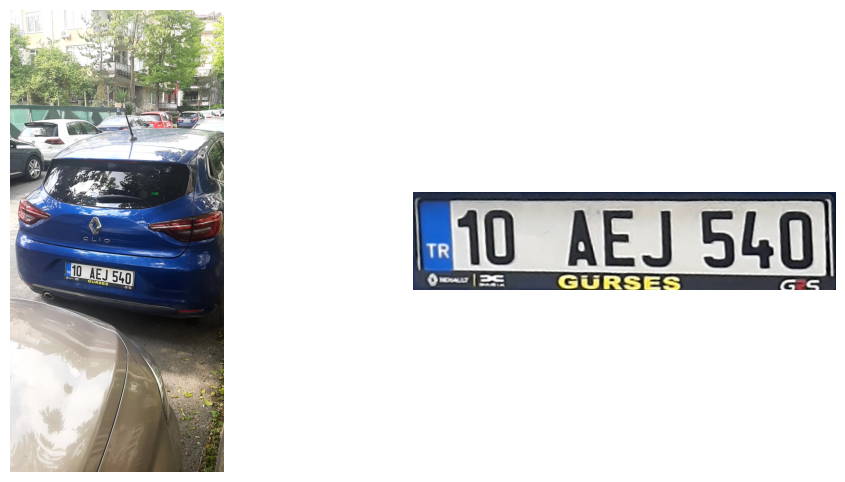

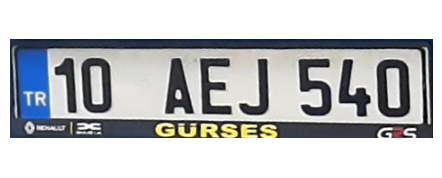

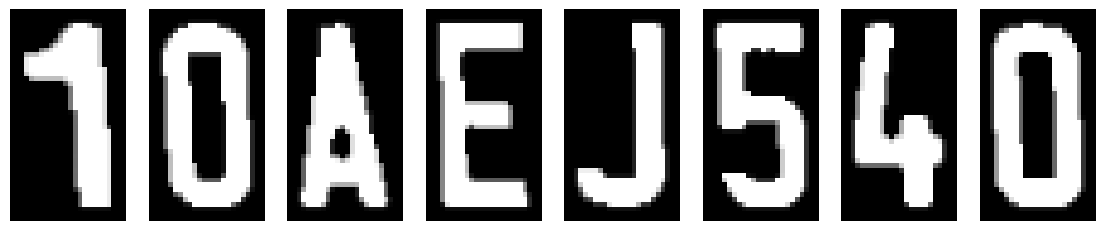

In [24]:

importlib.reload(functions)
importlib.reload(visualize_functions)
importlib.reload(calculation_functions)
pictures_file_path = "test2"  

#model type can be cnn,tess or rcnn
model_type="cnn"
visualiziation_type=True
predicted_plates_CNN,actual_plates=functions.get_plates_from_photographs(pictures_file_path,wpod_net,model_type,model_CNN,labels_CNN,visualiziation_type)
print(predicted_plates_CNN)

For the video





In [1]:
importlib.reload(functions)
#source_path,txt_path=functions.run_Yolo_and_CNN('den.mp4')
# functions.show_video(source_path)
#pictures_file_path="den"
temp_cnn=[]
temp_cnn=functions.get_plates_from_video_with_frame(r"videos/3.mp4",wpod_net,model_CNN,labels_CNN)

arr1=[]
arr1=temp_cnn.copy()
print(temp_cnn)



print(functions.correct__final_predictions(arr1))

NameError: name 'importlib' is not defined

Performation Scores

In [ ]:
importlib.reload(calculation_functions)
print(functions.global_i)

# acc_tess,prec_tess,recall_tess,f1_tess,true_positives_tess,total_characters_tess=calculation_functions.calculate_metrics_for_tesseract(actual_plates, predicted_plates_tesseract)
# acc_rCnn,prec_rCnn,recall_rCnn,f1_rCnn,true_positives_rCnn,total_characters_rCnn=calculation_functions.calculate_metrics_for_R_CNN(actual_plates, predicted_plates_R_CNN)
acc_Cnn,prec_Cnn,recall_Cnn,f1_Cnn,true_positives_Cnn,total_characters_Cnn=calculation_functions.calculate_metrics_for_CNN(actual_plates, predicted_plates_CNN)
# acc_Cnn_vgg,prec_Cnn_vgg,recall_Cnn_vgg,f1_Cnn_vgg,true_positives_Cnn_vgg,total_characters_Cnn_vgg=calculation_functions.calculate_metrics_for_CNN(actual_plates, predicted_plates_CNN_vgg)

print("Actual Plates:                 ",actual_plates)
# print("Predicted Plates for tesseract:",predicted_plates_tesseract)
# print("Predicted Plates for r-CNN:    ",predicted_plates_R_CNN)
print("Predicted Plates for CNN:      ",predicted_plates_CNN)
# print("Predicted Plates for CNN-VGG:      ",predicted_plates_CNN_vgg)




In [ ]:


# Çubuk genişliği
# model_names = ['Tesseract', 'R-CNN', 'CNN','Yolo','CNN-VGG','CNN-Xception','Random-Forest']

# # Accuracy, precision, recall, F1 değerleri (örnek veriler)
# accuracy_scores = [acc_tess, acc_rCnn, 0.986,0.96,0.984,0.94,0.75]
# precision_scores = [prec_tess, prec_rCnn, 0.988,0.98,0.985,0.953,0.83]
# recall_scores = [recall_tess, recall_rCnn, 0.987,0.97,0.984,0.94,0.79]
# f1_scores = [f1_tess, f1_rCnn, 0.987,0.97,0.984,0.953,0.82]

# Metriklerin adları

model_names = ['CNN-ResNet50','CNN-VGG','CNN-Xception']
accuracy_scores=[0.986,0.984,0.94]
precision_scores=[0.988,0.985,0.953]
recall_scores=[0.987,0.984,0.94]
f1_scores=[0.987,0.984,0.953]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
width = 0.2
x = np.arange(len(model_names))

# Çubuk grafikleri oluşturma

fig, ax = plt.subplots(figsize=(13, 8))



rects1 = ax.bar(x - width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x, precision_scores, width, label='Precision')
rects3 = ax.bar(x + width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 2*width, f1_scores, width, label='F1')

# Eksen ve başlıklar
ax.set_ylabel('Values')
ax.set_title('Performance of Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)

plt.xticks(x, model_names, rotation='100', ha='right')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
ax.set_ylim([0.9, 1])
# Çubuk grafiklerini gösterme
plt.savefig("31.jpg")
plt.show()

In [ ]:
x = np.arange(len(model_names))

plt.figure(figsize=(13, 10)) 

plt.plot(x, accuracy_scores, marker='*', label='Accuracy')
plt.plot(x, precision_scores, marker='o', label='Precision')
plt.plot(x, recall_scores, marker='o', label='Recall')
plt.plot(x, f1_scores, marker='^', label='F1')

# Eksen ve başlıklar
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Performance of Models')
plt.xticks(x, model_names)
plt.legend()

In [ ]:
accuracy_scores=[0.986,0.984,0.94]
precision_scores=[0.988,0.985,0.953]
recall_scores=[0.987,0.984,0.94]
f1_scores=[0.987,0.984,0.953]

matrix_tess = [0.975,0.977,0.976,0.976]

for i in range(len(matrix_tess)):
    matrix_tess[i] = round(matrix_tess[i], 3)

matrix_rCnn = [0.815,0.875,0.85,0.87]
for i in range(len(matrix_rCnn)):
    matrix_rCnn[i] = round(matrix_rCnn[i], 3)

matrix_Cnn = [0.986,0.988 ,0.987,0.987 ]
for i in range(len(matrix_Cnn)):
    matrix_Cnn[i] = round(matrix_Cnn[i], 3)

matrix_Cnn_vgg = [0.984,0.985 ,0.984,0.984 ]
for i in range(len(matrix_Cnn_vgg)):
    matrix_Cnn_vgg[i] = round(matrix_Cnn_vgg[i], 3)

matrix_yolo = [0.967,0.986 ,0.975,0.974 ]
for i in range(len(matrix_yolo)):
    matrix_yolo[i] = round(matrix_yolo[i], 3)

matrix_Cnn_xception = [0.943,0.953 ,0.945,0.953 ]
for i in range(len(matrix_yolo)):
    matrix_yolo[i] = round(matrix_yolo[i], 3)

matrix_RandomForest = [0.754,0.837 ,0.795,0.823 ]
for i in range(len(matrix_yolo)):
    matrix_yolo[i] = round(matrix_yolo[i], 3)

performance_matrix = np.array([matrix_tess,matrix_rCnn,matrix_yolo,matrix_Cnn,matrix_Cnn_vgg,matrix_Cnn_xception,matrix_RandomForest])

x_size, y_size = performance_matrix.shape

# Matrisi görselleştirme
fig, ax = plt.subplots(figsize=(10, 9))
im = ax.imshow(performance_matrix, cmap='summer')

# Renk çubuğu oluşturma
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Values', rotation=-90, va="bottom")

# Eksen etiketleri ve başlık
ax.set_xticks(np.arange(y_size))
ax.set_yticks(np.arange(x_size))
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1'], rotation=45)
# ax.set_yticklabels(['CNN-ResNet50','CNN-VGG','CNN-XCeption'])
ax.set_yticklabels(['Tesseract', 'R-CNN', 'YOLO','CNN-ResNet50','CNN-VGG','CNN-XCeption','Random Forest'])

ax.set_title('Matrix of Performance Models')

# Matris değerlerini yazdırma
for i in range(x_size):
    for j in range(y_size):
        text = ax.text(j, i, performance_matrix[i, j], ha="center", va="center", color="k")

# Grafik düzenlemeleri

plt.tight_layout()
plt.savefig("zoooooort.jpg")
# Matrisi gösterme
plt.show()


# The end!